# Literature rank

This is a small project to visualize citation data among other biophysics postdocs. 

At this time I'm a third year postdoc at Princeton, and I wanted to see how my citation count compares to others in the field.

This data is from the Publish or Perish (PoP) software, which is a tool for analyzing academic citations.

> Harzing, A.W. (2007) Publish or Perish, available from https://harzing.com/resources/publish-or-perish

I did a simple search:
1. I used PoP to search Google scholar for "biophysics" and "postdoc" in the title.
2. Since Google scholar limts the number of results, I did a simple search for ~1000 results.
    * This sample is not exhaustive, and I did not check how randomized it is. I assume it is a representative sample.
    * It includes mostly people from the US and Europe, and some from Asia. 
    * I recognized a few names from my own field, so I assume it is a reasonable sample.

3. in this script I filter out the people who started publishing before me in 2017 and plot the distribution of citations.
    * Log-normal seems to fit well, so I can roughly estimate where my percentile is in the distribution.
    * You can also estimate it naively, just by sorting the citation numbers.

There are many more interesting things that can be done better, but this is a simple start.

Created by Milos Nikolic, Aug 5th 2025

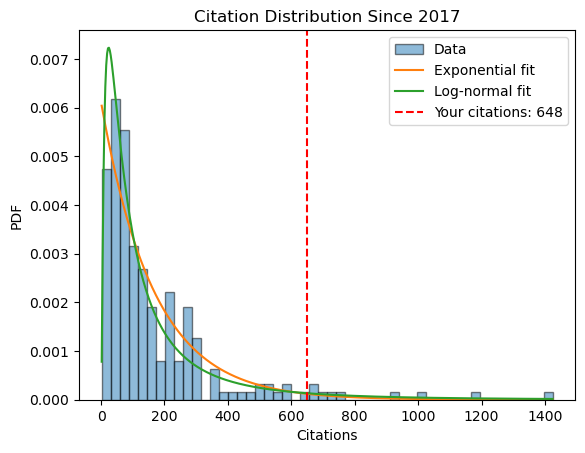

A researcher with 648 citations is in the 96th percentile.
out of 444 researchers with citations > 0 since 2017.


In [15]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# filter data

# Compute percentile for 648 citations (this is how many I have on Google Scholar on Aug 6, 2025)
your_citations = 648


useSimplePercentile = True  # Set to True to use simple percentile calculation
startYear= 2017  # Year to filter publications from

# Load CSV file
df = pd.read_csv("PoPMetrics.csv")

# Ensure 'Citations' and 'year_first' columns are numeric
df['Citations'] = pd.to_numeric(df['Citations'], errors='coerce')
df['year_first'] = pd.to_numeric(df['year_first'], errors='coerce')

# Filter out rows with zero or missing citations
df_cited = df[df['Citations'] > 0]

# Filter for recent entries (year_first > startYear) with citations > 0
df_recent = df_cited[df_cited['year_first'] >= startYear]

# plot citation distribution

citations = df_recent['Citations'].values

# Histogram
plt.hist(citations, bins=50, density=True, alpha=0.5, label='Data', edgecolor='black')

# Fit exponential
loc_exp, scale_exp = stats.expon.fit(citations)
x = np.linspace(min(citations), max(citations), 500)
plt.plot(x, stats.expon.pdf(x, loc=loc_exp, scale=scale_exp), label='Exponential fit')

# Fit log-normal
shape, loc, scale = stats.lognorm.fit(citations, floc=0)
mu = np.log(scale)
sigma = shape
plt.plot(x, stats.lognorm.pdf(x, shape, loc, scale), label='Log-normal fit')
plt.axvline(your_citations, color='red', linestyle='--', label=f'Your citations: {your_citations}') 
# plt.xscale('log') # optional
# plt.yscale('log')
plt.xlabel('Citations')
plt.ylabel('PDF')
plt.title('Citation Distribution Since 2017')
plt.legend()
plt.show()


if useSimplePercentile:
    percentile = (citations < your_citations).mean() * 100
else:
    percentile = stats.norm.cdf((np.log(your_citations) - mu) / sigma) * 100

print(f"A researcher with {your_citations:.0f} citations is in the {percentile:.0f}th percentile.")
print(f"out of {len(df_recent)} researchers with citations > 0 since 2017.")
